In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
test_csv_path = '../Data/dataTemp/output_review_yelpHotelData_NRYRcleaned.csv'
df_yelpchi1 = pd.read_csv(test_csv_path, sep='delimiter', header=None)

In [4]:
print(df_yelpchi1.tail(10))

                                                      0
5844  My friend and I, along with our mothers, staye...
5845  staff was rude, revolving door was really hard...
5846  So Surprising when we arrived, The staff was g...
5847  ost things about this hotel were nice. However...
5848  I agree with all the complimentary things othe...
5849  This hotel is amazing! Granted, I worked here,...
5850  "Short Version: I am very torn about this plac...
5851  Sutton Place is a very elegant hotel. The room...
5852  "The only great thing is location. Rest of the...
5853  Noise, noise, noise! Unbelievable! Between the...


In [5]:
sample = df_yelpchi1[0]

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
swords = set(stopwords.words("english"))
stemmer = PorterStemmer()

def parse_text(review):
    clean_review = []
    # text = re.sub("[^a-zA-Z]", ' ', text)
    # text = text.lower().split()
    # text = [w for w in text if w not in swords]
    
    # # Stemming
    # stems = [stemmer.stem(ss) for ss in text]
    for text in review:
        text = re.sub("[^a-zA-Z]", ' ', text)
        text = text.lower().split()
        text = [w for w in text if w not in swords]
        
        # Stemming
        # stems = [stemmer.stem(ss) for ss in text]
        text = " ".join(text)
        clean_review.append(text)
    
    return clean_review

sample = parse_text(sample)

In [8]:
df_clean = pd.DataFrame(sample,columns = ['text'])
print(df_clean['text'].tail(20))

5834    westins definitely nice one issue front desk s...
5835    stayed last sunday april friends visiting chic...
5836    fantastic place staff consistant definately ba...
5837                  great place stay many business near
5838    post scriptum earlier less positive review day...
5839    boyfriend stayed hotel pretty cheap night grea...
5840    choose hotel via hotwire happier mark front de...
5841    booked hotel last minute trip chicago moment w...
5842    place awesome well except weird order channels...
5843    husband enjoyed stay february great value rece...
5844    friend along mothers stayed laquinta november ...
5845    staff rude revolving door really hard push per...
5846    surprising arrived staff great rooms cleaned s...
5847    ost things hotel nice however light sleeper al...
5848    agree complimentary things others said special...
5849    hotel amazing granted worked might biased ever...
5850    short version torn place great things things t...
5851    sutton

In [13]:
### MENGINPUT METADATA

df_meta = pd.read_csv("../output_meta_yelpHotelData_NRYRcleaned.csv", sep=';')
print(df_meta.shape)

df_meta['label'] = df_meta['label'].replace({'N': 0, 'Y': 1})
df_meta


(5854, 9)


,date,review_id,reviewer_id,product_id,label,useful_count,funny_count,cool_count,rate
0,06/08/2011,MyNjnxzZVTPq,IFTr6_6NI4CgCVavIL9k5g,tQfLGoolUMu2J0igcWcoZg,0,28,11,18,5
1,8/30/2011,BdD7fsPqHQL73hwENEDT-Q,c_-hF15XgNhlyy_TqzmdaA,tQfLGoolUMu2J0igcWcoZg,0,4,3,0,3
2,6/26/2009,BfhqiyfC,CiwZ6S5ZizAFL5gypf8tLA,tQfLGoolUMu2J0igcWcoZg,0,23,14,12,5
3,9/16/2010,Ol,nf3q2h-kSQoZK2jBY92FOg,tQfLGoolUMu2J0igcWcoZg,0,6,2,8,1
4,02/05/2010,i4HIAcNTjabdpG1K4F5Q2g,Sb3DJGdZ4Rq__CqxPbae-g,tQfLGoolUMu2J0igcWcoZg,0,9,4,11,3
...,...,...,...,...,...,...,...,...,...
5849,10/15/2008,4d3lJEG5RgDDS_PimakHDw,eIOn-m017t7nu3FGpasPTg,gCdjyQeE0uRKCh7mVmnZzQ,1,0,0,0,5
5850,8/22/2011,M9sPYJENivJyWYuLwy7SCw,oVzvotuHA5u5Ob0E7i58Cw,rpP9iZsT3NC-Z4pUtQGoiA,1,0,0,0,3
5851,05/02/2011,IErE0ydkkLfAoePgqrVdUQ,wKPzlSO-Vyrzk8JlXr0cyQ,rpP9iZsT3NC-Z4pUtQGoiA,1,0,0,0,4
5852,12/19/2010,NnkA6YT9xo_IaZ5xZI_5zQ,SL4aEwrM2q0HAXHpduMQ1Q,rpP9iZsT3NC-Z4pUtQGoiA,1,0,0,0,1


In [15]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, LSTM, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization

from sklearn.model_selection import train_test_split


0    5076
1     778
Name: label, dtype: int64

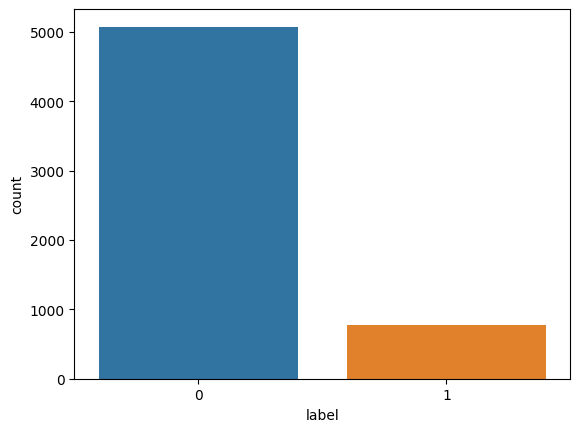

In [16]:
#variable of genuine (o) or fake (1)
sns.countplot(x='label', data=df_meta)
df_meta['label'].value_counts()
# df_label_merged.tail(10)

In [60]:
# RANDOM UNDERSAMPLING
def sampling(text,label):
    df_temp = text
    df_temp['label'] = label #df_meta['label']
    minority_class = len(df_temp[df_temp['label'] == 1])
    minority_class_idx = df_temp[df_temp['label'] == 1].index
    mayority_class_idx = df_temp[df_temp['label'] == 0].index
    random_majority_idx = np.random.choice(mayority_class_idx,minority_class,replace=False)
    under_sample_idx = np.concatenate([minority_class_idx,random_majority_idx])
    under_sample = df_temp.loc[under_sample_idx]
    print(under_sample['label'].value_counts())
    return under_sample

# original_sample = df_clean df_meta['label']
#under_sampling_small = sampling(df_clean,df_meta['label'])
under_sample = sampling(df_clean,df_meta['label'])

1    778
0    778
Name: label, dtype: int64


<AxesSubplot: xlabel='label', ylabel='count'>

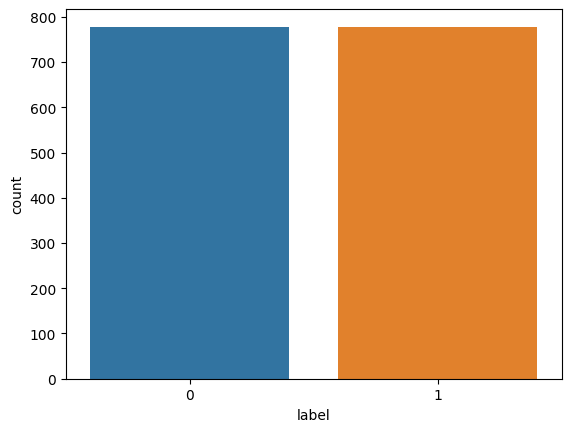

In [61]:
sns.countplot(x='label', data=under_sample)

In [22]:
#Memuat rand sampling yang pernah digunakan
load_csv_path = '../undersampling_data.csv'
df_yelpchi1 = pd.read_csv(load_csv_path, sep=',')
df_load = df_yelpchi1
df_load.tail(10)

,text,label
1546,stayed weekend july hotel ruined hotel stays g...,0
1547,wholeheartedly agree hotel become sad case eve...,0
1548,small hotel west magnificent mile pleasant eno...,0
1549,really looking forward upscale night break usu...,0
1550,parents stayed visiting nice small hotel great...,0
1551,second time staying palmer house love first ti...,0
1552,never stay better service best western start f...,0
1553,minutes check drafty windows made room damp ra...,0
1554,boyfriend stayed anniversary pleased first roo...,0
1555,heart location right broadway lakeview boot me...,0


<AxesSubplot: xlabel='label', ylabel='count'>

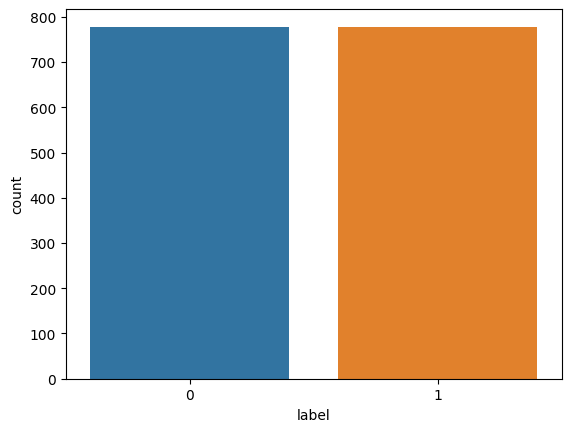

In [25]:
sns.countplot(x='label', data=df_load)

In [89]:
### PRE-PROCESS TAHAP 3-TOKENISASI
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras. preprocessing.sequence import pad_sequences
review_text = df_load['text'].to_list()
token = Tokenizer()
token.fit_on_texts(review_text) #Tokenisasi menggunakan lib dari keras
token.index_word

{1: 'hotel',
 2: 'room',
 3: 'great',
 4: 'stay',
 5: 'rooms',
 6: 'nice',
 7: 'would',
 8: 'chicago',
 9: 'one',
 10: 'service',
 11: 'staff',
 12: 'night',
 13: 'like',
 14: 'place',
 15: 'get',
 16: 'location',
 17: 'stayed',
 18: 'us',
 19: 'good',
 20: 'time',
 21: 'really',
 22: 'bed',
 23: 'also',
 24: 'could',
 25: 'even',
 26: 'back',
 27: 'clean',
 28: 'got',
 29: 'desk',
 30: 'floor',
 31: 'day',
 32: 'small',
 33: 'bar',
 34: 'front',
 35: 'well',
 36: 'free',
 37: 'go',
 38: 'check',
 39: 'lobby',
 40: 'bathroom',
 41: 'view',
 42: 'friendly',
 43: 'little',
 44: 'much',
 45: 'two',
 46: 'people',
 47: 'first',
 48: 'hotels',
 49: 'right',
 50: 'comfortable',
 51: 'food',
 52: 'never',
 53: 'price',
 54: 'breakfast',
 55: 'city',
 56: 'next',
 57: 'everything',
 58: 'parking',
 59: 'shower',
 60: 'around',
 61: 'way',
 62: 'experience',
 63: 'area',
 64: 'wedding',
 65: 'definitely',
 66: 'went',
 67: 'pretty',
 68: 'water',
 69: 'door',
 70: 'helpful',
 71: 'make',
 72: '

In [90]:
encode_text = token.texts_to_sequences(review_text)

In [18]:
# # Near-Miss Under Sampling
# nmiss = RandomOverSampler(random_state=42)
# under_text, under_label = nmiss.fit_resample(X_review_tfidf,df_meta['label'])

In [91]:
genuine_fake = df_load['label']
genuine_fake = to_categorical(genuine_fake)
print(genuine_fake)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(encode_text,genuine_fake, random_state=0, test_size=0.10, stratify=genuine_fake)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=0, test_size=0.10)

In [93]:
vocab = len(token.index_word)+1
max_kata = 300
X_train = pad_sequences(X_train, maxlen=max_kata, padding='post' )
X_test = pad_sequences(X_test, maxlen=max_kata, padding='post' )
X_val = pad_sequences(X_val, maxlen=max_kata, padding='post' )

In [94]:
vocab

10237

In [95]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1260, 300)
(156, 300)
(140, 300)
(1260, 2)
(156, 2)
(140, 2)


In [34]:
from gensim.models import KeyedVectors

In [36]:
word2vec = KeyedVectors.load_word2vec_format("../Data/GoogleNews-vectors-negative300.bin", binary=True)

In [26]:
# # Testing Some Simliarities 
# w2 = 'love'
# word2vec.most_similar_cosmul(positive=w2)

In [96]:
# Word Embedding
def make_embedding(unique_word,text):
    embedding_dim = 300
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in word2vec.index_to_key:
            matrix[i] = word2vec[word]
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix

embedding_matrix = make_embedding(vocab,token.word_index.items())

Null word embeddings: 672


In [97]:
embedding_matrix.shape

(10238, 300)

In [30]:
# #cleansing lexicon
# def clean_key(key):
#     cleaned_key = key.strip().lower()  # remove whitespace and convert to lowercase
#     cleaned_key = re.sub('[^a-z0-9]+', '', cleaned_key)  # remove non-alphanumeric characters
#     return cleaned_key

# for key in list(senticnet.keys()):
#     cleaned_key = clean_key(key)
#     if cleaned_key != key:
#         senticnet[cleaned_key] = senticnet.pop(key)

In [98]:
from senticnet4 import senticnet4

senticnet = senticnet4.senticnet
#mengambil hanya nilai polaritinya saja
for key in senticnet:
    senticnet[key] = senticnet[key][:4]

In [33]:
# lexicon_matrix = np.zeros((vocab+1, 4))

# for word, i in token.word_index.items():      
#     if word in senticnet:
#         lexicon_matrix[i] = senticnet.get(word)
        
# print('Null word embeddings: %d' % np.sum(np.sum(lexicon_matrix, axis=1) == 0))

In [99]:
def make_lex_embedding(unique_word,text):
    embedding_dim = 4
    matrix = np.zeros((unique_word+1, embedding_dim)) 
    for word, i in text:
        if word in senticnet:
            matrix[i] = senticnet.get(word)
    
    print('Null word embeddings: %d' % np.sum(np.sum(matrix, axis=1) == 0))
    return matrix


lexicon_matrix = make_lex_embedding(vocab,token.word_index.items())

Null word embeddings: 5780


In [100]:
dfae = pd.DataFrame(lexicon_matrix)
dfae.head(30)

,0,1,2,3
0,0.000,0.000,0.000,0.000
1,-0.070,0.000,0.009,-0.120
2,0.000,-0.070,0.000,0.000
3,0.905,0.773,0.000,0.892
4,0.053,0.127,-0.080,0.134
5,0.000,0.000,0.000,0.000
6,0.147,0.126,-0.090,0.314
7,0.000,0.000,0.000,0.000
8,0.000,0.000,0.000,0.000
9,-0.610,0.000,0.856,-0.820


In [101]:
print(embedding_matrix.shape)
print(lexicon_matrix.shape)

(10238, 300)
(10238, 4)


In [27]:
# from senticnet.senticnet import SenticNet
# sn = SenticNet()
# import nltk
# nltk.download('sentiwordnet')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# from nltk.corpus import sentiwordnet as swn

# concatenation = []

# for word in splited_word:      
#     if word in word2vec:
#         #append the embedding to the concatenation array
#         concatenation.extend(word2vec[word])

#     synsets = list(swn.senti_synsets(word))
#     if synsets:
#         # take the first synset 
#         senti_synset = synsets[0]
#         #append the embedding of the concept to the concatenation array
#         concatenation.append(senti_synset.pos_score())
#         concatenation.append(senti_synset.neg_score())
#         concatenation.append(senti_synset.obj_score())
#     # if word in sn:
#     #     concatenation.extend(list(sn.sentics(word).values()))
#     #     #sentics = sn.sentics(word)

# #concatenation.extend([sentics['pleasantness'],sentics['attention'],sentics['sensitivity'],sentics['aptitude'],sentics['polarity']])
# concatenation = np.reshape(concatenation, (1, -1))
# input_tensor = Input(shape=(concatenation.shape[1],))


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [102]:
#naive concatenation, mengkonkat kedua feature tanpa prerlakuan khusus
def naive_concatenation(word2vec_features, lexicon_features):
    return np.concatenate((word2vec_features, lexicon_features), axis=1)

concatenated_f = naive_concatenation(embedding_matrix,lexicon_matrix)

In [103]:
#multichannel dimana feature dengan dimensi terkecil(lexicon) akan mempadding dirinya agar bisa seimbang dalam pemisahan di channel model
def concatenate_features(x, x_lex):
    w2vdim = x.shape[1]
    lexdim = x_lex.shape[1]
    npad = ((0, 0), (0, w2vdim - lexdim))

    x_lex_padded = np.pad(x_lex, pad_width=npad, mode='constant', constant_values=0)
    x_fat = np.concatenate((x[..., np.newaxis], x_lex_padded[..., np.newaxis]), axis=2)

    return x_lex_padded

multichannel_f = concatenate_features(embedding_matrix,lexicon_matrix)

#seleksi fitur word embedding glove
embedding_dictionary = dict()
#glove_file = open('C:\Users\Sayang\Documents\code skripsi\dataTemp\Glove.6B.100d.txt', encoding='utf8')
glove_file = open('C:\glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embedding_dictionary [word] = vector_dimensions
glove_file.close()

from numpy import zeros

embedding_matrix = zeros((vocab, 100))
for word, index in token.word_index.items(): #index_word
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def generate_model_report(y_actual,y_prediction):
    akurasi = accuracy_score(y_actual,y_prediction)
    recall = recall_score(y_actual,y_prediction)
    presisi = precision_score(y_actual,y_prediction)
    f1 = f1_score(y_actual,y_prediction)
    auc = roc_auc_score(y_actual,y_prediction)
    # print("Akurasi : ", akurasi)
    # print("Recall : ", recall)
    # print("Presisi : ", presisi)
    # print("F1-Score : ",f1)
    return akurasi, recall, presisi, f1, auc

In [105]:
def cnn_base(embedding_layer,dim):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= vocab+1, output_dim=dim, weights=embedding_layer, input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_base = cnn_base(None,300)
model_base.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_12 (Embedding)    (None, 300, 300)          3071400   
                                                                 
 conv1d_20 (Conv1D)          (None, 298, 64)           57664     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 149, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 147, 128)          24704     
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 73, 128)          0         
 g1D)                                                      

In [106]:
# model_base.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
history_base = model_base.fit(X_train, y_train, epochs=10,batch_size=16, validation_data=(X_val,y_val))

Epoch 1/10
79/79 [==============================] - 13s 136ms/step - loss: 0.6938 - accuracy: 0.5230 - val_loss: 0.6897 - val_accuracy: 0.5714
Epoch 2/10
79/79 [==============================] - 11s 135ms/step - loss: 0.6796 - accuracy: 0.5817 - val_loss: 0.6879 - val_accuracy: 0.5357
Epoch 3/10
79/79 [==============================] - 11s 135ms/step - loss: 0.6582 - accuracy: 0.6500 - val_loss: 0.6806 - val_accuracy: 0.6071
Epoch 4/10
79/79 [==============================] - 11s 144ms/step - loss: 0.6201 - accuracy: 0.6817 - val_loss: 0.6716 - val_accuracy: 0.5857
Epoch 5/10
79/79 [==============================] - 11s 144ms/step - loss: 0.5517 - accuracy: 0.7437 - val_loss: 0.6650 - val_accuracy: 0.5857
Epoch 6/10
79/79 [==============================] - 11s 143ms/step - loss: 0.4515 - accuracy: 0.8262 - val_loss: 0.7005 - val_accuracy: 0.5714
Epoch 7/10
79/79 [==============================] - 11s 136ms/step - loss: 0.3458 - accuracy: 0.8738 - val_loss: 0.6844 - val_accuracy: 0.5929

In [107]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

eval_base = model_base.evaluate(X_test, y_test)
y_pred=model_base.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test,axis=1)
cm1 =confusion_matrix(y_testnp,y_pred)
acc_base, recall_base, preisi_base, f1_base, auc_base = generate_model_report(y_testnp,y_pred)

5/5 [==============================] - 1s 110ms/step


In [108]:
model_naive_c = cnn_base([concatenated_f],concatenated_f.shape[1])
model_naive_c.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 300)]             0         
                                                                 
 embedding_13 (Embedding)    (None, 300, 304)          3112352   
                                                                 
 conv1d_22 (Conv1D)          (None, 298, 64)           58432     
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 149, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 147, 128)          24704     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 73, 128)          0         
 g1D)                                                      

In [109]:
history_naive = model_naive_c.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
20/20 [==============================] - 12s 463ms/step - loss: 0.6925 - accuracy: 0.5460 - val_loss: 0.6923 - val_accuracy: 0.5071
Epoch 2/10
20/20 [==============================] - 9s 447ms/step - loss: 0.6574 - accuracy: 0.6000 - val_loss: 0.6835 - val_accuracy: 0.6214
Epoch 3/10
20/20 [==============================] - 10s 479ms/step - loss: 0.6185 - accuracy: 0.7056 - val_loss: 0.6875 - val_accuracy: 0.5357
Epoch 4/10
20/20 [==============================] - 9s 469ms/step - loss: 0.5828 - accuracy: 0.7143 - val_loss: 0.6731 - val_accuracy: 0.6000
Epoch 5/10
20/20 [==============================] - 9s 429ms/step - loss: 0.5435 - accuracy: 0.7754 - val_loss: 0.6696 - val_accuracy: 0.6071
Epoch 6/10
20/20 [==============================] - 9s 457ms/step - loss: 0.4914 - accuracy: 0.8111 - val_loss: 0.6716 - val_accuracy: 0.6000
Epoch 7/10
20/20 [==============================] - 9s 463ms/step - loss: 0.4634 - accuracy: 0.8230 - val_loss: 0.6599 - val_accuracy: 0.6143
Epoc

In [110]:
eval_naive = model_naive_c.evaluate(X_test, y_test)
y_pred=model_naive_c.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test,axis=1)
cm2 =confusion_matrix(y_testnp,y_pred)
acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive = generate_model_report(y_testnp,y_pred)
print(acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive)

5/5 [==============================] - 1s 83ms/step
0.6538461538461539 0.3717948717948718 0.8529411764705882 0.5178571428571428 0.6538461538461539


In [111]:
def cnn_multichannel(embedding_layer,lexicon_layer):
    input_word = Input(shape=(max_kata,))
    embed_word = Embedding(input_dim= vocab+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= vocab+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)
    # define the convolution layer
    # concatenated = concatenate([embed_word, embed_lex], axis=-1)
    concatenated = concatenate([embed_word, embed_lex], axis=-1)
    x = Conv1D(64, kernel_size=3, activation='relu')(concatenated)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    # flatten the output
    x = GlobalMaxPooling1D()(x)
    # define the output layer
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_multichannel = cnn_multichannel(embedding_matrix,multichannel_f)
model_multichannel.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 300, 300)     3071400     ['input_11[0][0]']               
                                                                                                  
 embedding_15 (Embedding)       (None, 300, 300)     3071400     ['input_11[0][0]']               
                                                                                                  
 concatenate_8 (Concatenate)    (None, 300, 600)     0           ['embedding_14[0][0]',           
                                                                  'embedding_15[0][0]']    

In [112]:
history_multi = model_multichannel.fit(X_train, y_train, epochs=10,batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
20/20 [==============================] - 18s 774ms/step - loss: 0.6927 - accuracy: 0.5254 - val_loss: 0.6869 - val_accuracy: 0.5357
Epoch 2/10
20/20 [==============================] - 15s 728ms/step - loss: 0.6531 - accuracy: 0.7016 - val_loss: 0.6799 - val_accuracy: 0.5786
Epoch 3/10
20/20 [==============================] - 15s 777ms/step - loss: 0.6242 - accuracy: 0.6635 - val_loss: 0.6748 - val_accuracy: 0.6000
Epoch 4/10
20/20 [==============================] - 17s 871ms/step - loss: 0.5992 - accuracy: 0.6897 - val_loss: 0.6749 - val_accuracy: 0.5643
Epoch 5/10
20/20 [==============================] - 13s 667ms/step - loss: 0.5537 - accuracy: 0.7508 - val_loss: 0.6664 - val_accuracy: 0.6214
Epoch 6/10
20/20 [==============================] - 15s 755ms/step - loss: 0.5469 - accuracy: 0.7294 - val_loss: 0.6667 - val_accuracy: 0.5714
Epoch 7/10
20/20 [==============================] - 15s 752ms/step - loss: 0.4870 - accuracy: 0.7913 - val_loss: 0.6598 - val_accuracy: 0.6214

In [113]:
eval_multi = model_multichannel.evaluate(X_test, y_test)
y_pred=model_multichannel.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test,axis=1)
cm3 =confusion_matrix(y_testnp,y_pred)
acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi = generate_model_report(y_testnp,y_pred)
print(acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi)

5/5 [==============================] - 1s 180ms/step
0.7051282051282052 0.5384615384615384 0.8076923076923077 0.6461538461538461 0.7051282051282051


In [86]:
def cnn_separated_conv(embedding_layer,lexicon_layer):
    input_word = Input(shape=(max_kata,))
    # define the embedding layer
    embed_word = Embedding(input_dim= vocab+1, output_dim=embedding_layer.shape[1], weights=[embedding_layer], input_length=max_kata, trainable = False)(input_word)
    embed_lex = Embedding(input_dim= vocab+1, output_dim=lexicon_layer.shape[1], weights=[lexicon_layer], input_length=max_kata, trainable = False)(input_word)

    # make conv layer for embed word
    x1 = Conv1D(64, kernel_size=3, activation='relu')(embed_word)
    x2 = Conv1D(128, kernel_size=3, activation='relu')(embed_word)
    concatenated_1 = concatenate([x1, x2], axis=-1)
    pool1 = MaxPooling1D(pool_size=2)(concatenated_1)
    # make conv layer for embed lex
    x3 = Conv1D(64, kernel_size=3, activation='relu')(embed_lex)
    x4 = Conv1D(128, kernel_size=3, activation='relu')(embed_lex)
    concatenated_2 = concatenate([x3, x4], axis=-1)
    pool2 = MaxPooling1D(pool_size=2)(concatenated_2)
    # combining all seperated conv
    concatenated_3 = concatenate([pool1, pool2], axis=-1)
    x = Dropout(0.5)(concatenated_3)
    x = GlobalMaxPooling1D()(x)
    # x = Dense(128, activation='relu')(x)
    output_tensor = Dense(2, activation='sigmoid')(x)
    model = Model(input_word, outputs=output_tensor)
    model.compile(optimizer='adam',  loss="binary_crossentropy", metrics=['accuracy'])
    return model

model_separated = cnn_separated_conv(embedding_matrix,lexicon_matrix)
model_separated.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 181)]        0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 181, 300)     3069600     ['input_8[0][0]']                
                                                                                                  
 embedding_11 (Embedding)       (None, 181, 4)       40928       ['input_8[0][0]']                
                                                                                                  
 conv1d_16 (Conv1D)             (None, 179, 64)      57664       ['embedding_10[0][0]']           
                                                                                            

In [87]:
history_separated = model_separated.fit(X_train, y_train, epochs=10,batch_size=32, validation_data=(X_val,y_val))

Epoch 1/10
40/40 [==============================] - 24s 510ms/step - loss: 0.7020 - accuracy: 0.5468 - val_loss: 0.6805 - val_accuracy: 0.5500
Epoch 2/10
40/40 [==============================] - 15s 373ms/step - loss: 0.6178 - accuracy: 0.6770 - val_loss: 0.6672 - val_accuracy: 0.6214
Epoch 3/10
40/40 [==============================] - 15s 369ms/step - loss: 0.5641 - accuracy: 0.7667 - val_loss: 0.6615 - val_accuracy: 0.6214
Epoch 4/10
40/40 [==============================] - 17s 421ms/step - loss: 0.5063 - accuracy: 0.8040 - val_loss: 0.6531 - val_accuracy: 0.6429
Epoch 5/10
40/40 [==============================] - 16s 401ms/step - loss: 0.4556 - accuracy: 0.8476 - val_loss: 0.6435 - val_accuracy: 0.6714
Epoch 6/10
40/40 [==============================] - 13s 338ms/step - loss: 0.4041 - accuracy: 0.8865 - val_loss: 0.6399 - val_accuracy: 0.6429
Epoch 7/10
40/40 [==============================] - 15s 385ms/step - loss: 0.3423 - accuracy: 0.9286 - val_loss: 0.6399 - val_accuracy: 0.6214

In [88]:
eval_seperated = model_separated.evaluate(X_test, y_test)
y_pred=model_separated.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_testnp=np.argmax(y_test,axis=1)
cm4 =confusion_matrix(y_testnp,y_pred)
acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated = generate_model_report(y_testnp,y_pred)
print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated)

5/5 [==============================] - 1s 138ms/step
0.6923076923076923 0.8205128205128205 0.6530612244897959 0.7272727272727272 0.6923076923076923


In [58]:
print(acc_base, recall_base, preisi_base, f1_base, auc_base)
print(acc_naive, recall_naive, preisi_naive, f1_naive, auc_naive)
print(acc_multi, recall_multi, preisi_multi, f1_multi, auc_multi)
print(acc_seperated, recall_seperated, preisi_seperated, f1_seperated, auc_seperated)

0.6474358974358975 0.6794871794871795 0.6385542168674698 0.6583850931677019
0.7435897435897436 0.782051282051282 0.7261904761904762 0.7530864197530864
0.6538461538461539 0.4358974358974359 0.7727272727272727 0.5573770491803278
0.7243589743589743 0.6025641025641025 0.7966101694915254 0.6861313868613139


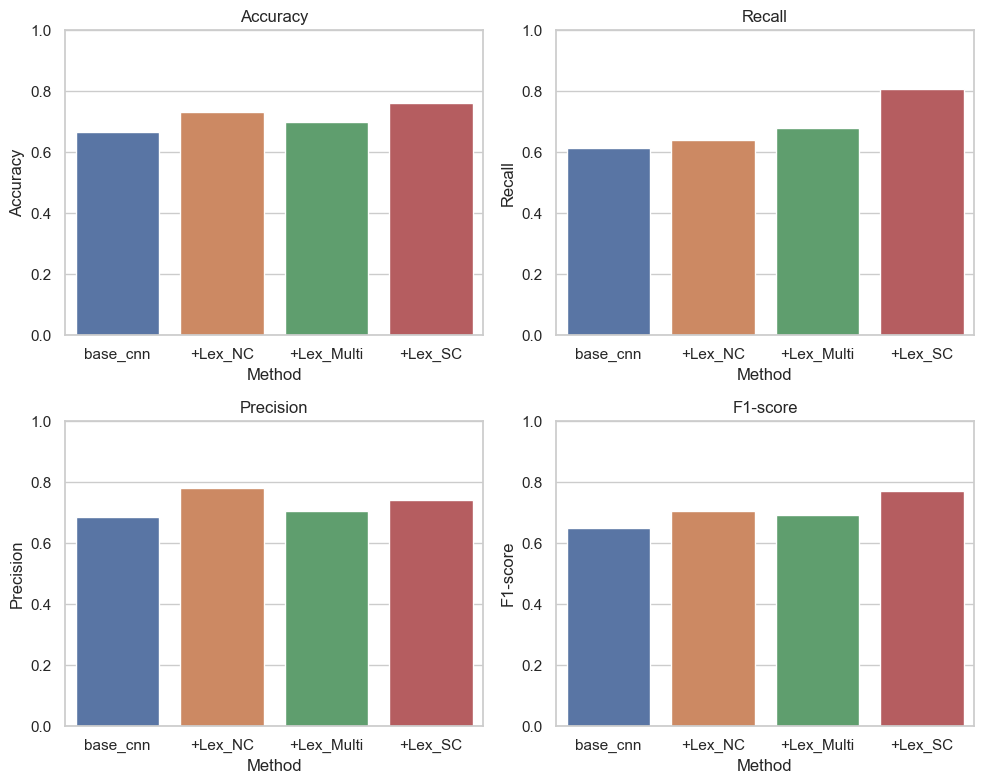

In [79]:
# method_name = ['base_line_CNN','Lex_NC_CNN','Lex_Multi_CNN','Lex_SC_CNN']
# method_value = [[acc_base,recall_base,preisi_base,f1_base],[acc_naive,recall_naive,preisi_naive,f1_naive],[acc_multi,recall_multi,preisi_multi,f1_multi],
#     [acc_seperated,recall_seperated,preisi_seperated,f1_seperated]]
method_name = ['Accuracy','Recall','Precision','F1-score','Method','num']
method_value = [[acc_base,acc_naive,acc_multi,acc_seperated],[recall_base,recall_naive,recall_multi,recall_seperated],[preisi_base,preisi_naive,preisi_multi,preisi_seperated],
    [f1_base,f1_naive,f1_multi,f1_seperated],['base_cnn','+Lex_NC','+Lex_Multi','+Lex_SC'],[1,2,3,4]]

method_result= dict(zip(method_name,method_value))
method_result= pd.DataFrame(method_result)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot a histogram for each metric
sns.barplot(ax=axes[0, 0], data=method_result, y="Accuracy", x="Method")
sns.barplot(ax=axes[0, 1], data=method_result, y="Recall", x="Method")
sns.barplot(ax=axes[1, 0], data=method_result, y="Precision", x="Method")
sns.barplot(ax=axes[1, 1], data=method_result, y="F1-score", x="Method")

# Set the title for each plot
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylim(0,1)
axes[0, 1].set_title("Recall")
axes[0, 1].set_ylim(0,1)
axes[1, 0].set_title("Precision")
axes[1, 0].set_ylim(0,1)
axes[1, 1].set_title("F1-score")
axes[1, 1].set_ylim(0,1)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()
# # plot histogram for each metric
# for metric in method_result.columns:
#     plt.hist(method_result[metric], alpha=0.5, label=metric)

# plt.legend(loc='upper right')
# plt.show()

In [80]:
def make_plot_hist(m1,m2,m3,m4,train, validation, title):
    graph = plt.subplot(2,2,1)
    graph = plt.plot(m1.history[train],label='train')
    graph = plt.plot(m1.history[validation],label='val')
    graph = plt.subplot(2,2,2)
    graph = plt.plot(m2.history[train],label='train')
    graph = plt.plot(m2.history[validation],label='val')
    graph = plt.subplot(2,2,3)
    graph = plt.plot(m3.history[train],label='train')
    graph = plt.plot(m3.history[validation],label='val')
    graph = plt.subplot(2,2,4)
    graph = plt.plot(m4.history[train],label='train')
    graph = plt.plot(m4.history[validation],label='val')
    plt.legend()
    graph = plt.show()
    return graph

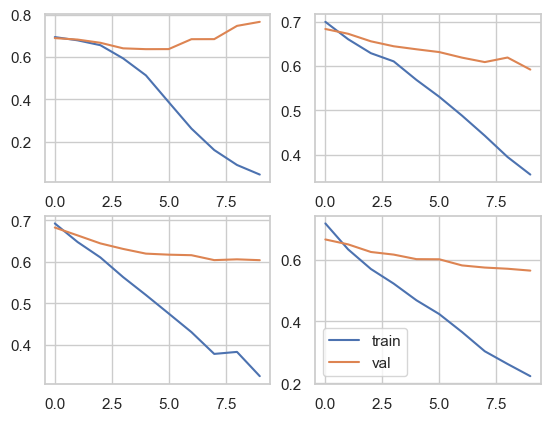

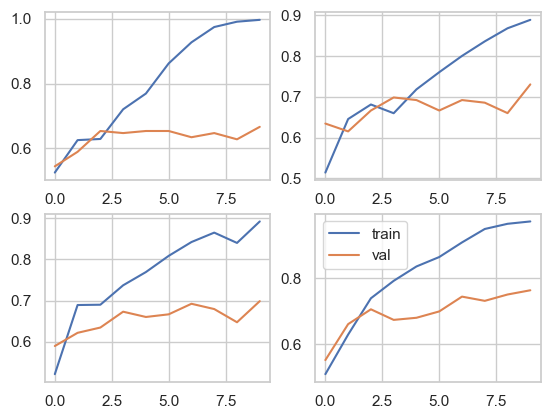

In [81]:
make_plot_hist(history_base,history_naive,history_multi,history_separated,'loss','val_loss','Perubahan loss pada tiap epochs')
make_plot_hist(history_base,history_naive,history_multi,history_separated,'accuracy','val_accuracy','Perubahan akurasi pada tiap epochs')

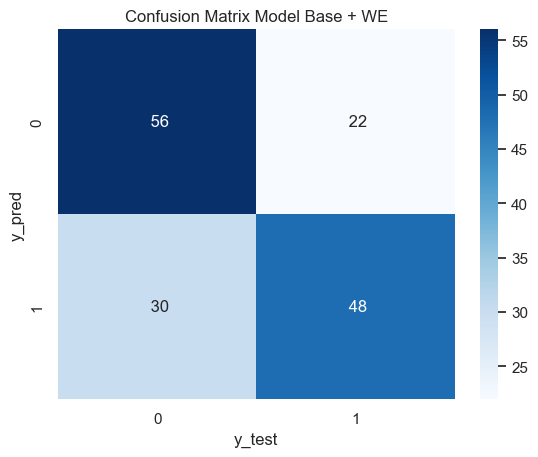

In [58]:
def out_cm(cm,title):
    ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
    ax.set_title(title)
    ax.set_xlabel('y_test')
    ax.set_ylabel('y_pred')

out_cm(cm1,'Confusion Matrix Model Base + WE')

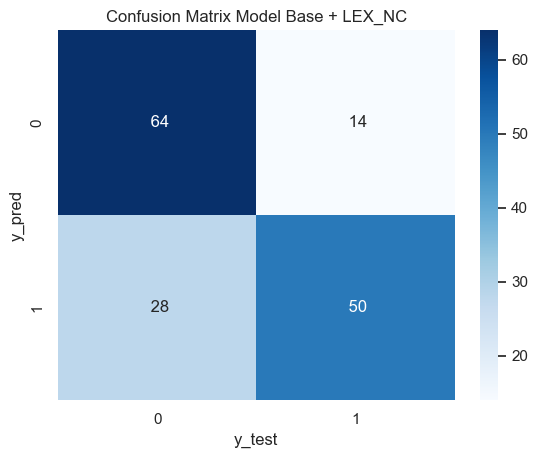

In [59]:
out_cm(cm2,'Confusion Matrix Model Base + LEX_NC')

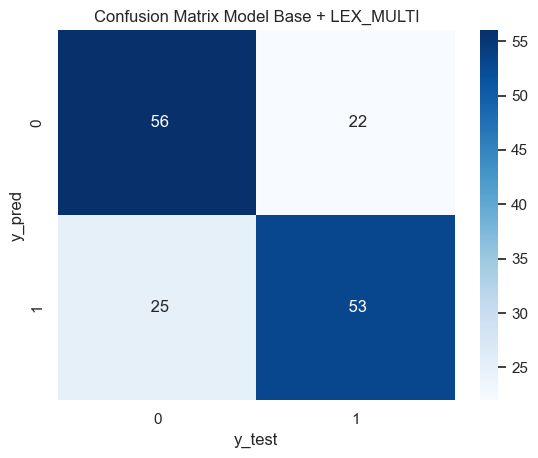

In [82]:
out_cm(cm3,'Confusion Matrix Model Base + LEX_MULTI')

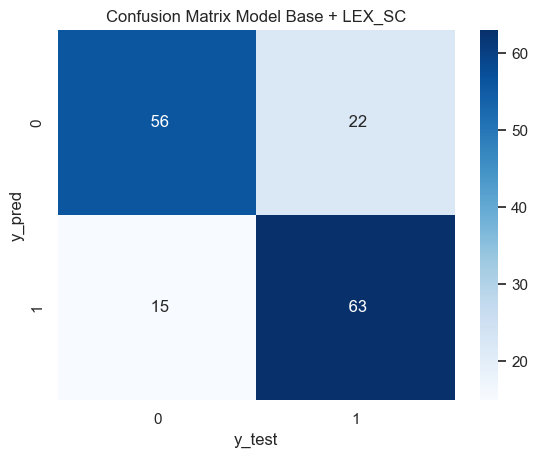

In [83]:
out_cm(cm4,'Confusion Matrix Model Base + LEX_SC')